<a href="https://colab.research.google.com/github/Parvfect/SINDy/blob/main/autoencoders_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using autoencoders to learn a compressed version of the MNIST *dataset*

Following - https://blog.keras.io/building-autoencoders-in-keras.html

Inspired by - http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

Neural Networks, Manifolds and Topology

In [ ]:
import keras
from keras import layers

In [ ]:
encoding_dim = 32

input_img = keras.Input(shape =(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

Looks like we're gonna input an image, fold it over itself and then make it pass through a bottleneck

In [ ]:
# Creating seperate retrivable encoder, decoder models as well as checkpoints
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape = (encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# Training our autoencoder to reconstruct MNIST digits

# Compiling the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Inputting the data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize all the values between 0 and 1 and flatten the 28x28 images 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


""
It is most common to use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately.

Regarding the division by 255, this is the maximum value of a byte (the input feature's type before the conversion to float32), so this will ensure that the input features are scaled between 0.0 and 1.0. This is not compulsory, but I usually prefer to have input features about that scale so that the default learning rate (and other hyperparameters) work reasonably well, and so that the cost can take on reasonable values that I am used to. For example, suppose the scale is 100 times the scale you are used to, then the learning rate should be 100 times smaller than you are used to, and the loss will be larger than usual (if it is the mean squared error, the loss will likely be 100^2=10000 times larger than you are used to).
""

In [ ]:
# Training autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data = (x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2776 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1717 - val_loss: 0.1543
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1446 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1288 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1187 - val_loss: 0.1134
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1117 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1067 - val_loss: 0.1032
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1028 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0999 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0978 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

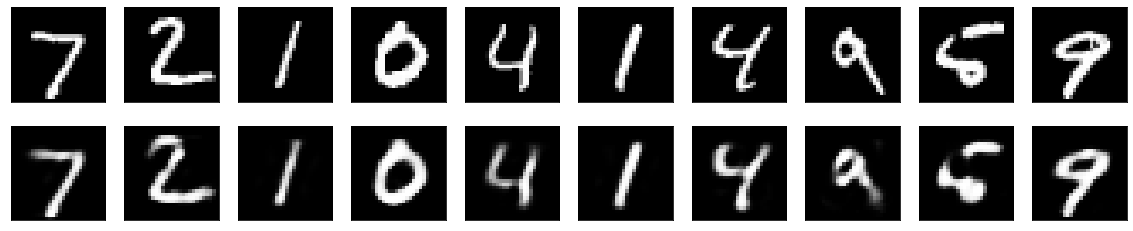

In [ ]:
# Let us vizualise the reconstructred inputs and the encoded representations using matplotlib

import matplotlib.pyplot as plt

n=10  # Number of digits to display

plt.figure(figsize=(20, 4))

for i in range(n):
  # Display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Adding a sparsity constraint on the encoded representation

## Deep Autoencoder

## Convolutional Autoencoder

## Application to image denoising

## Sequence to Sequence autoencoder

## Variational Autoencoder